# Frozen Lake

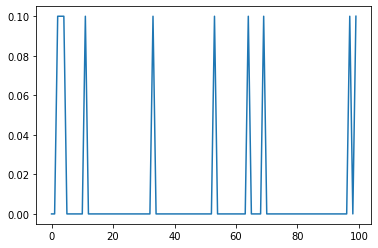

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

n_games = 1000
win_pct = []
scores = []

for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score += reward
    scores.append(score)

    if i%10 == 0:
        average = np.mean(scores[-10:])
        win_pct.append(average)
plt.plot(win_pct)
plt.show()


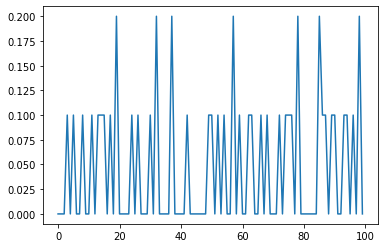

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

policy = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:1, 10:1, 13:2, 14:2}

n_games = 1000
win_pct = []
scores = []

for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = policy[obs]
        obs, reward, done, info = env.step(action)
        score += reward
    scores.append(score)

    if i%10 == 0:
        average = np.mean(scores[-10:])
        win_pct.append(average)
plt.plot(win_pct)
plt.show()


~~~

In [11]:
import numpy as np

class Agent():
    def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}

        self.init_Q()

    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state,action)] = 0.0

    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i  in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state,a)] for a in range(self.n_actions)])
            action = np.argmax(actions)
        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min else self.eps_min

    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_,a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)

        self.Q[(state, action)] += self.lr*(reward + self.gamma*self.Q[(state_, a_max)] - self.Q[(state, action)])
        self.decrement_epsilon()


episode  0 win pct 0.00 epsilon 1.00
episode  1000 win pct 0.00 epsilon 0.96
episode  2000 win pct 0.01 epsilon 0.93
episode  3000 win pct 0.02 epsilon 0.89
episode  4000 win pct 0.01 epsilon 0.86
episode  5000 win pct 0.02 epsilon 0.82
episode  6000 win pct 0.01 epsilon 0.79
episode  7000 win pct 0.03 epsilon 0.76
episode  8000 win pct 0.03 epsilon 0.73
episode  9000 win pct 0.06 epsilon 0.70
episode  10000 win pct 0.08 epsilon 0.67
episode  11000 win pct 0.03 epsilon 0.65
episode  12000 win pct 0.03 epsilon 0.62
episode  13000 win pct 0.04 epsilon 0.59
episode  14000 win pct 0.05 epsilon 0.57
episode  15000 win pct 0.08 epsilon 0.54
episode  16000 win pct 0.00 epsilon 0.52
episode  17000 win pct 0.02 epsilon 0.50
episode  18000 win pct 0.05 epsilon 0.48
episode  19000 win pct 0.03 epsilon 0.46
episode  20000 win pct 0.03 epsilon 0.44
episode  21000 win pct 0.04 epsilon 0.42
episode  22000 win pct 0.10 epsilon 0.40
episode  23000 win pct 0.06 epsilon 0.38
episode  24000 win pct 0.07 e

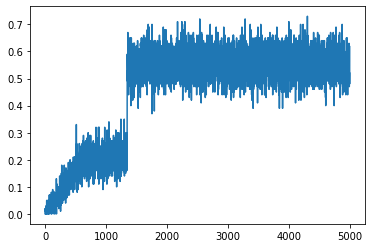

In [12]:
import gym
import matplotlib.pyplot as plt
import numpy as np

if __name__=='__main__':
    env = gym.make('FrozenLake-v0')
    agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, eps_dec = 0.999995, n_actions = 4, n_states=16)

    scores = []
    win_pct_list = []
    n_games = 500000

    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            agent.learn(observation, action, reward, observation_)
            score += reward
            observation = observation_
        scores.append(score)
        if i%100 == 0:
            win_pct = np.mean(scores[-100:])
            win_pct_list.append(win_pct)
            if i%1000 == 0:
                print('episode ',i,'win pct %.2f' % win_pct,'epsilon %.2f' % agent.epsilon)
    plt.plot(win_pct_list)
    plt.show()
